# Data and Data Visualization
Machine learning, and therefore a large part of AI, is based on statistical analysis of data. In this notebook, you'll examine some fundamental concepts related to data and data visualization.

## Introduction to Data
Statistics are based on data, which consist of a collection of pieces of information about things you want to study. This information can take the form of descriptions, quantities, measurements, and other observations. Typically, we work with related data items in a *dataset*, which often consists of a collection of *observations* or *cases*. Most commonly, we thing about this dataset as a table that consists of a row for each observation, and a column for each individual data point related to that observation - we variously call these data points *attributes* or *features*, and they each describe a specific characteristic of the thing we're observing.

Let's take a look at a real example. In 1886, Francis Galton conducted a study into the relationship between heights of parents and their (adult) children. Run the Python code below to view the data he collected (you can safely ignore a deprecation warning if it is displayed):

In [1]:
import statsmodels.api as sm

df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data
df.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5


### Types of Data
Now, let's take a closer look at this data (you can click the left margin next to the dataset to toggle between full height and a scrollable pane). There are 933 observations, each one recording information pertaining to an individual child. The information recorded consists of the following features:
- **family**: An identifier for the family to which the child belongs.
- **father**: The height of the father.
- ** mother**: The height of the mother.
- **midparentHeight**: The mid-point between the father and mother's heights (calculated as *(father + 1.08 x mother) &div; 2*)
- **children**: The total number of children in the family.
- **childNum**: The number of the child to whom this observation pertains (Galton numbered the children in desending order of height, with male children listed before female children)
- **gender**: The gender of the child to whom this observation pertains.
- **childHeight**: The height of the child to whom this observation pertains.

It's worth noting that there are several distinct types of data recorded here. To begin with, there are some features that represent *qualities*, or characteristics of the child - for example, gender. Other feaures represent a *quantity* or measurement, such as the child's height. So broadly speaking, we can divide data into *qualitative* and *quantitative* data.

#### Qualitative Data
Let's take a look at qualitative data first. This type of data is categorical - it is used to categorize or identify the entity being observed. Sometimes you'll see features of this type described as *factors*. 
##### Nominal Data
In his observations of children's height, Galton assigned an identifier to each family and he recorded the gender of each child. Note that even though the **family** identifier is a number, it is not a measurement or quantity. Family 002 it not "greater" than family 001, just as a **gender** value of "male" does not indicate a larger or smaller value than "female". These are simply named values for some characteristic of the child, and as such they're known as *nominal* data.
##### Ordinal Data
So what about the **childNum** feature? It's not a measurement or quantity - it's just a way to identify individual children within a family. However, the number assigned to each child has some additional meaning - the numbers are ordered. You can find similar data that is text-based; for example, data about training courses might include a "level" attribute that indicates the level of the course as "basic:, "intermediate", or "advanced". This type of data, where the value is not itself a quantity or measurement, but it indicates some sort of inherent order or heirarchy, is known as *ordinal* data.
#### Quantitative Data
Now let's turn our attention to the features that indicate some kind of quantity or measurement.
##### Discrete Data
Galton's observations include the number of **children** in each family. This is a *discrete* quantative data value - it's something we *count* rather than *measure*. You can't, for example, have 2.33 children!
##### Continuous Data
The data set also includes height values for **father**, **mother**, **midparentHeight**, and **childHeight**. These are measurements along a scale, and as such they're described as *continuous* quantative data values that we *measure* rather than *count*.

### Sample vs Population
Galton's dataset includes 933 observations. It's safe to assume that this does not account for every person in the world, or even just the UK, in 1886 when the data was collected. In other words, Galton's data represents a *sample* of a larger *population*. It's worth pausing to think about this for a few seconds, because there are some implications for any conclusions we might draw from Galton's observations.

Think about how many times you see a claim such as "one in four Americans enjoys watching football". How do the people who make this claim know that this is a fact? Have they asked everyone in the the US about their football-watching habits? Well, that would be a bit impractical, so what usually happens is that a study is conducted on a subset of the population, and (assuming that this is a well-conducted study), that subset will be a representative sample of the population as a whole. If the survey was conducted at the stadium where the Superbowl is being played, then the results are likely to be skewed because of a bias in the study participants.

Similarly, we might look at Galton's data and assume that the heights of the people included in the study bears some relation to the heights of the general population in 1886; but if Galton specifically selected abnormally tall people for his study, then this assumption would be unfounded.

When we deal with statistics, we usually work with a sample of the data rather than a full population. As you'll see later, this affects the way we use notation to indicate statistical measures; and in some cases we calculate statistics from a sample differently than from a full population to account for bias in the sample.

### Visualizing Data
Data visualization is one of the key ways in which we can examine data and get insights from it. If a picture is worth a thousand words, then a good graph or chart is worth any number of tables of data.

Let's examine some common kinds of data visualization:
#### Bar Charts
A *bar chart* is a good way to compare numeric quantities or counts across categories. For example, in the Galton dataset, you might want to compare the number of female and male children.

Here's some Python code to create a bar chart showing the number of children of each gender.

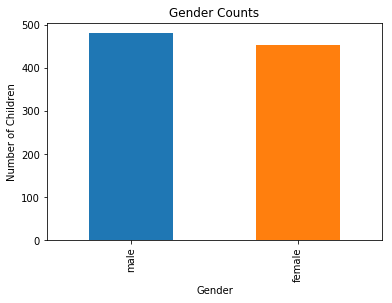

In [2]:
import statsmodels.api as sm

df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Create a data frame of gender counts
genderCounts = df['gender'].value_counts()

# Plot a bar chart
%matplotlib inline
from matplotlib import pyplot as plt

genderCounts.plot(kind='bar', title='Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Number of Children')
plt.show()

From this chart, you can see that there are slightly more male children than female children; but the data is reasonably evenly split between the two genders.

***Bar charts are typically used to compare categorical (qualitative) data values;*** but in some cases you might treat a discrete quantitative data value as a category. For example, in the Galton dataset the number of children in each family could be used as a way to categorize families. We might want to see how many familes have one child, compared to how many have two children, etc.

Here's some Python code to create a bar chart showing family counts based on the number of children in the family.

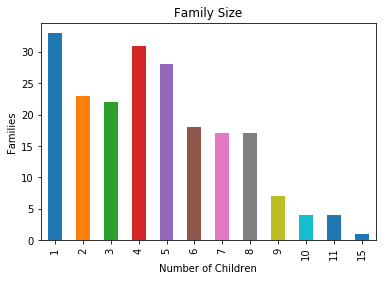

In [3]:
import statsmodels.api as sm

df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Create a data frame of child counts
# there's a row for each child, so we need to filter to one row per family to avoid over-counting
families = df[['family', 'children']].drop_duplicates()
# Now count number of rows for each 'children' value, and sort by the index (children)
childCounts = families['children'].value_counts().sort_index()


# Plot a bar chart
%matplotlib inline
from matplotlib import pyplot as plt

childCounts.plot(kind='bar', title='Family Size')
plt.xlabel('Number of Children')
plt.ylabel('Families')
plt.show()


Note that the code sorts the data so that the categories on the *x* axis are in order - attention to this sort of detail can make your charts easier to read. In this case, we can see that the most common number of children per family is 1, followed by 5 and 6. Comparatively fewer families have more than 8 children.

#### Histograms
**Bar charts work well for comparing categorical or discrete numeric values. ** When you need to compare continuous quantitative values, you can use a similar style of chart called a *histogram*. Histograms differ from bar charts in that they group the continuous values into ranges or *bins* - so the chart doesn't show a bar for each individual value, but rather a bar for each range of binned values. Because these bins represent continuous data rather than discrete data, the bars aren't separated by a gap. Typically, a histogram is used to show the relative frequency of values in the dataset.

Here's some Python code to create a histogram of the **father** values in the Galton dataset, which record the father's height:

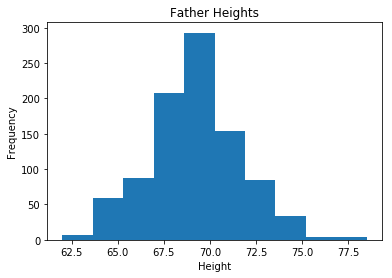

In [4]:
import statsmodels.api as sm

df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Plot a histogram of midparentHeight
%matplotlib inline
from matplotlib import pyplot as plt

df['father'].plot.hist(title='Father Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the most frequently occuring heights tend to be in the mid-range. There are fewer extremely short or exteremely tall fathers.

In the histogram above, the number of bins (and their corresponding ranges, or *bin widths*) was determined automatically by Python. In some cases you may want to explicitly control the number of bins, as this can help you see detail in the distribution of data values that otherwise you might miss. ***The following code creates a histogram for the same father's height values, but explicitly distributes them over 20 bins (19 are specified, and Python adds one):***

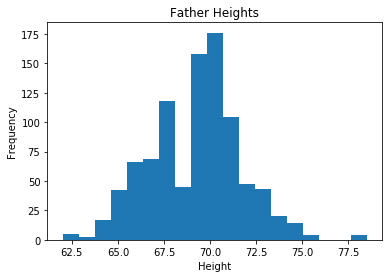

In [5]:
import statsmodels.api as sm

df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Plot a histogram of midparentHeight
%matplotlib inline
from matplotlib import pyplot as plt

df['father'].plot.hist(title='Father Heights', bins=19)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

We can still see that the most common heights are in the middle, but there's a notable drop in the number of fathers with a height between 67.5 and 70.

#### Pie Charts
Pie charts are another way to compare relative quantities of categories. They're not commonly used by data scientists, but they can be useful in many business contexts with manageable numbers of categories because they not only make it easy to compare relative quantities by categories; they also show those quantities as a proportion of the whole set of data.

Here's some Python to show the gender counts as a pie chart:

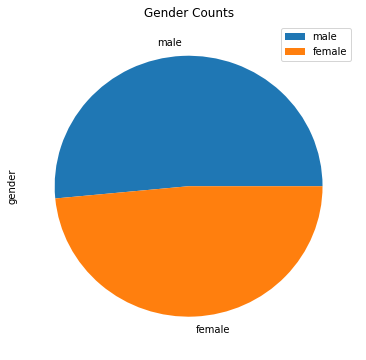

In [6]:
import statsmodels.api as sm

df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Create a data frame of gender counts
genderCounts = df['gender'].value_counts()

# Plot a pie chart
%matplotlib inline
from matplotlib import pyplot as plt
genderCounts.plot(kind='pie', title='Gender Counts', figsize=(6,6))
plt.legend()
plt.show()

Note that the chart includes a *legend* to make it clear what category each colored area in the pie chart represents. From this chart, you can see that males make up slightly more than half of the overall number of children; with females accounting for the rest.

#### Scatter Plots
Often you'll want to compare quantative values. This can be especially useful in data science scenarios where you are exploring data prior to building a machine learning model, as it can help identify apparent relationships between numeric features. Scatter plots can also help identify potential outliers - values that are significantly outside of the normal range of values.

The following Python code creates a scatter plot that plots the intersection points for  **midparentHeight** on the *x* axis, and **childHeight** on the *y* axis:

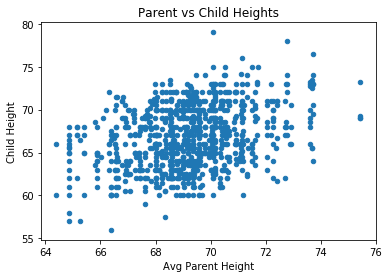

In [7]:
import statsmodels.api as sm

df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

# Create a data frame of heights (father vs child)
parentHeights = df[['midparentHeight', 'childHeight']]

# Plot a scatter plot chart
%matplotlib inline
from matplotlib import pyplot as plt
parentHeights.plot(kind='scatter', title='Parent vs Child Heights', x='midparentHeight', y='childHeight')
plt.xlabel('Avg Parent Height')
plt.ylabel('Child Height')
plt.show()

In a scatter plot, each dot marks the intersection point of the two values being plotted. In this chart, most of the heights are clustered around the center; which indicates that most parents and children tend to have a height that is somewhere in the middle of the range of heights observed. At the bottom left, there's a small cluster of dots that show some parents from the shorter end of the range who have children that are also shorter than their peers. At the top right, there are a few extremely tall parents who have extremely tall children. ***It's also interesting to note that the top left and bottom right of the chart are empty - there aren't any cases of extremely short parents with extremely tall children or vice-versa.***

#### Line Charts
*Line charts* are a great way to see changes in values along a series - usually (but not always) based on a time period. The Galton dataset doesn't include any data of this type, so we'll use a different dataset that includes observations of sea surface temperature between 1950 and 2010 for this example:

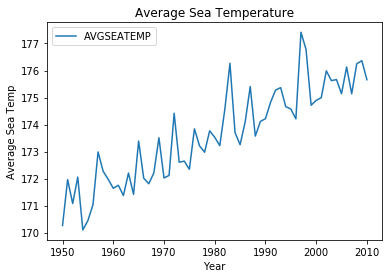

In [8]:
import statsmodels.api as sm

df = sm.datasets.elnino.load_pandas().data

df['AVGSEATEMP'] = df.mean(1)

# Plot a line chart
%matplotlib inline
from matplotlib import pyplot as plt
df.plot(title='Average Sea Temperature', x='YEAR', y='AVGSEATEMP')
plt.xlabel('Year')
plt.ylabel('Average Sea Temp')
plt.show()

The line chart shows the temperature trend from left to right for the period of observations. From this chart, you can see that the average temperature fluctuates from year to year, but the general trend shows an increase.